In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pygal as py
import squarify as sq
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [2]:
plt.rcParams["figure.figsize"] = (6,4)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 5}

matplotlib.rc('font', **font)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline 

In [3]:
# %%
df = pd.read_csv("../data/pre-processed-data.csv",
                 engine="python", encoding="ISO-8859-1")
df.head()



,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
# %%
col1 = df.keys()[0]
col2 = df.keys()[1]
col2

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [5]:
# %%
df2 = pd.DataFrame([[col1, col2]], columns=list([col1, col2]), index=[4845])

In [6]:
# Concatenate the new row to the original DataFrame and rename columns
df = pd.concat([df, df2], ignore_index=True)
df = df.set_axis(['sentiment', 'news'], axis=1)
df

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


<Axes: xlabel='count', ylabel='sentiment'>

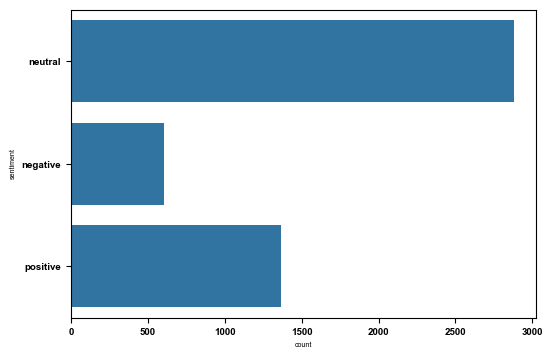

In [7]:
# %%
sns.countplot(y="sentiment", data=df)

In [8]:
# %%
from textblob import TextBlob

# %%


def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    return ReviewText


df['Review Text'] = preprocess(df['news'])
df['polarity'] = df['news'].map(lambda text: TextBlob(text).sentiment.polarity)
df['news_len'] = df['news'].astype(str).apply(len)
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))

In [9]:
# %%
print('top 4 random reviews with the highest positive sentiment polarity: \n')

df1 = df.drop_duplicates(subset=['Review Text'])

cl = df1.loc[df1.polarity == 1, ['Review Text']].sample(4).values
for c in cl:
    print(c[0])

top 4 random reviews with the highest positive sentiment polarity: 

You are warmly welcome !
Welcome !
`` In terms of profitability and earnings 2007 was the best year in our history , '' Chief Executive Veli-Matti Mattila said .
While I cant understand what theyre saying , its impressive to watch him hit that ball at those speeds .


In [10]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl1 = df.loc[df.polarity == 0, ['Review Text']].sample(5).values
for c in cl1:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

In Finland , insurance company Pohjola and the Finnish motorcyclist association have signed an agreement with the aim of improving motorcyclists ' traffic safety .
However , the brokers ' ratings on the stock differ .
Teleste BK Optiflex amplifier products will be used in ongoing capacity upgrade of KDG 's network to bi-directionality .
Finnish investment group Norvestia Oyj said its net profit fell to 23.5 mln euro $ 30.6 mln in 2006 from 33.5 mln euro $ 43.6 mln in 2005 .
Helsinki 19 May 2010 - Finnish company Lemminkainen Oyj ( HEL : LEM1S ) said today that it will construct an office building at Toolonlahti in downtown Helsinki , without disclosing financial details .


In [11]:
print('5 reviews with the most negative polarity having polarity lesser than -0.80: \n')
cl3 = df.loc[df.polarity <= -0.80, ['Review Text']].sample(5).values
for c in cl3:
    print(c[0])

5 reviews with the most negative polarity having polarity lesser than -0.80: 

There has been some recovery of the base metals prices and increased demand for metals in China , however .
Airvana 's UMTS Home Base Station femto cell uses software-based functionality and off-the-shelf silicon to accelerate feature development and reduce product cost .
Besides , as there is no depositor preference in Finland , senior debt and deposits rank on a par , which is also taken into consideration , the agency added .
The company has established a 3G base station at about 17,000 feet at the foot of Mount Everest that will enable mountain climbers at the 29,035-foot summit to surf the Internet and even send videos of their exploits .
Capital base and capital adequacy measurement is based on approaches under Basel II .


<Axes: xlabel='polarity'>

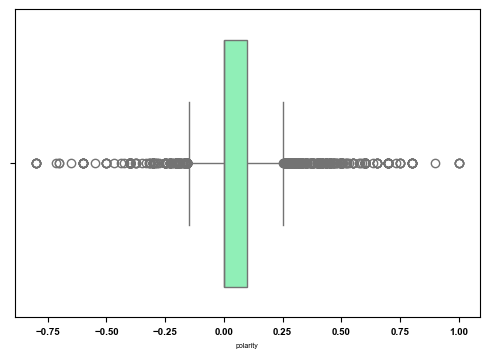

In [12]:
sns.boxplot(x="polarity", palette="rainbow", data=df)

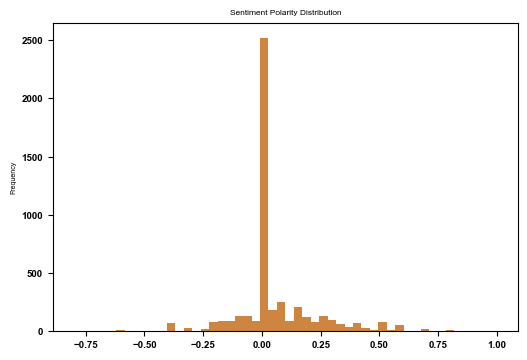

In [13]:
# %%
df['polarity'].plot(
    kind='hist',
    bins=50,
    color="peru",
    title='Sentiment Polarity Distribution')
plt.show()

In [14]:
# %%
p_s = df[df["polarity"] > 0].count()["sentiment"]
neu_s = df[df["polarity"] == 0].count()["sentiment"]
neg_s = df[df["polarity"] < 0].count()["sentiment"]

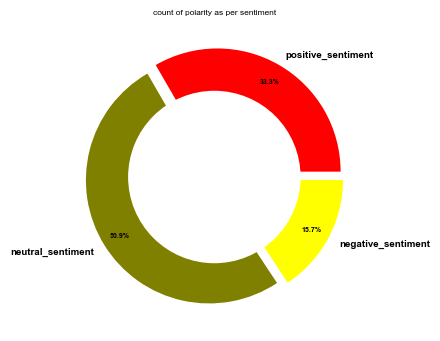

In [15]:
# %%
p_s = df[df["polarity"] > 0].count()["sentiment"]
neu_s = df[df["polarity"] == 0].count()["sentiment"]
neg_s = df[df["polarity"] < 0].count()["sentiment"]

# %%
# Setting labels for items in Chart
sentiment = ['positive_sentiment', "neutral_sentiment", "negative_sentiment"]

# Setting size in Chart based on given values
values = [p_s, neu_s, neg_s]

# colors
colors = ['#FF0000', 'olive', '#FFFF00']
# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(values, colors=colors, labels=sentiment,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('count of polarity as per sentiment')

# Displaying Chart
plt.show()

<Axes: >

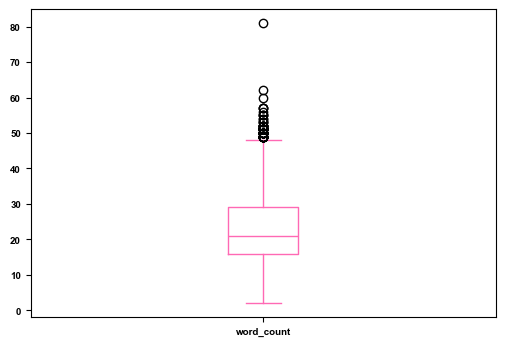

In [16]:
df.plot.box(y=["word_count"], color="hotpink")

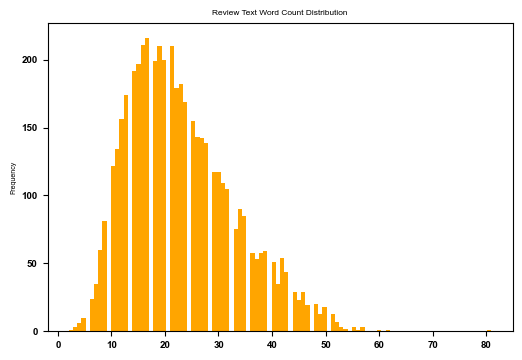

In [17]:
# %%
df['word_count'].plot(
    kind='hist',
    bins=100,
    color="orange",
    title='Review Text Word Count Distribution')
plt.show()

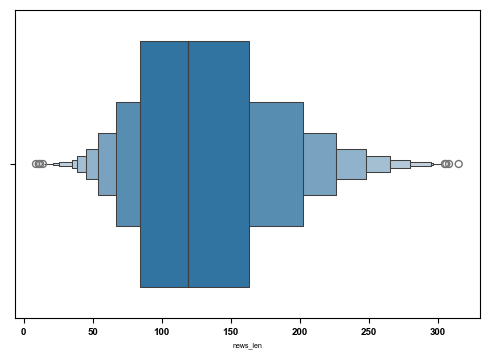

In [18]:
# %%
sns.boxenplot(x="news_len", data=df)
plt.show()

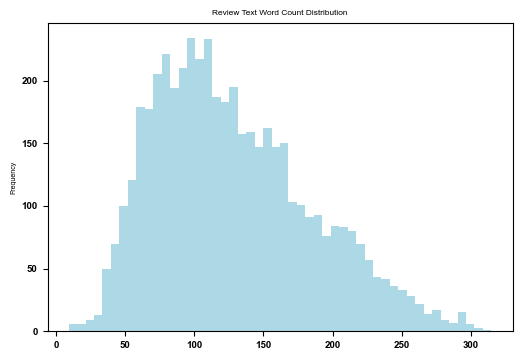

In [19]:
# %%
df['news_len'].plot(
    kind='hist',
    bins=50,
    color="lightblue",
    title='Review Text Word Count Distribution')
plt.show()

In [20]:
# %%
fig = px.scatter(df, x="news_len", y="word_count", color="sentiment",
                 marginal_x="box", marginal_y="violin",
                 title="Click on the legend items!")
fig.show()

the 6069
of 3215
in 2984
and 2596
to 2523
for 1152
eur 1018
is 930
company 851
will 850
from 769
on 727
its 646
has 578
with 573
by 559
said 545
as 544
be 542
finnish 524


,ReviewText,count
0,the,6069
1,of,3215
2,in,2984
3,and,2596
4,to,2523
5,for,1152
6,eur,1018
7,is,930
8,company,851
9,will,850


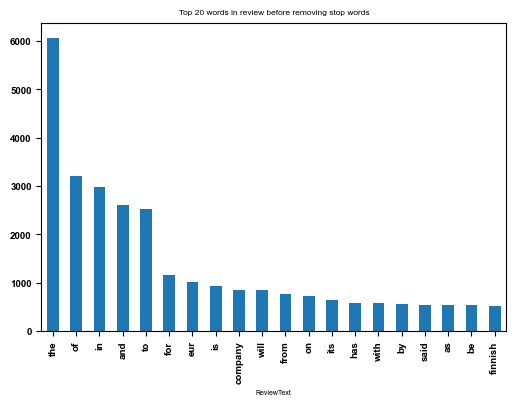

In [21]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns=['ReviewText', 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before removing stop words')
df1

eur 1018
company 851
said 545
finnish 524
mn 515
sales 455
million 440
net 413
profit 410
year 395
finland 353
group 324
2009 302
operating 299
2008 297
mln 291
new 277
business 270
period 266
quarter 258


<Axes: title={'center': 'Top 20 words in review after removing stop words'}, xlabel='ReviewText'>

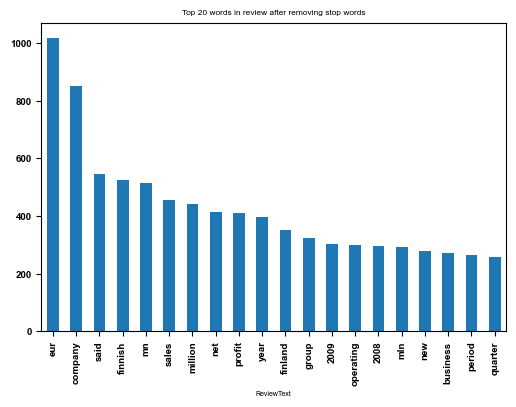

In [22]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns=['ReviewText', 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')

in the 804
of the 719
the company 504
for the 356
will be 272
net sales 246
to the 242
to eur 227
from eur 210
eur mn 196
operating profit 194
mn in 190
and the 182
on the 175
the first 159
quarter of 155
in finland 153
to be 153
of eur 144
at the 125


<Axes: title={'center': 'Top 20 bigrams in review before removing stop words'}, xlabel='ReviewText'>

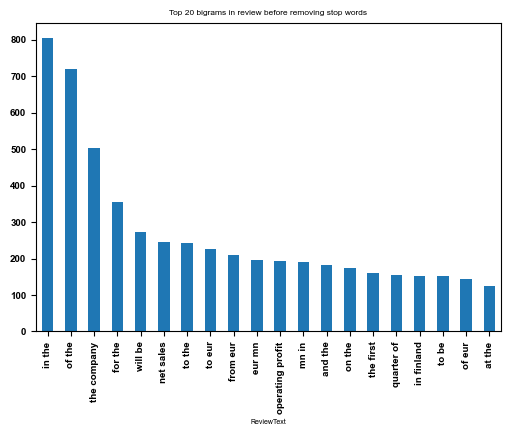

In [23]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns=['ReviewText', 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')

net sales 246
eur mn 196
operating profit 194
mn eur 127
corresponding period 108
mln euro 107
net profit 93
said today 86
oyj hel 85
company said 73
eur million 72
omx helsinki 63
profit eur 60
second quarter 57
euro mln 57
year earlier 56
mn corresponding 54
totalled eur 48
mln eur 48
net loss 47


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='ReviewText'>

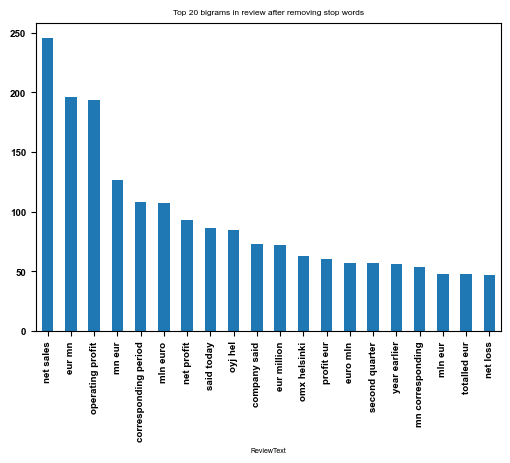

In [24]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns=['ReviewText', 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

mn in the 120
the corresponding period 108
corresponding period in 87
as well as 82
in the first 76
mn from eur 73
eur mn in 73
in the corresponding 73
the end of 68
net sales of 66
the first quarter 58
the company said 57
the third quarter 53
from eur mn 52
value of the 52
the second quarter 51
mln euro mln 51
the same period 49
in the second 46
first quarter of 44


<Axes: title={'center': 'Top 20 trigrams in review before removing stop words'}, xlabel='ReviewText'>

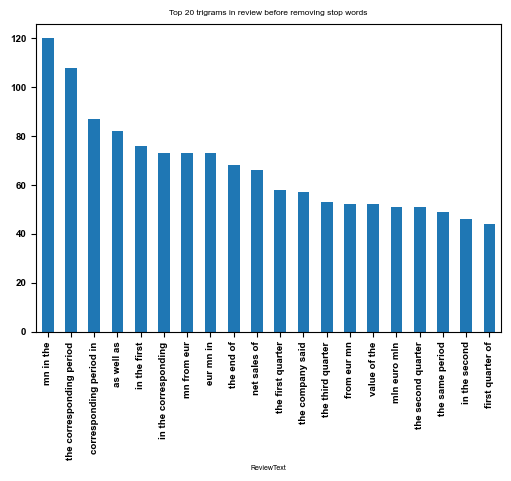

In [25]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_trigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns=['ReviewText', 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

mn corresponding period 54
mln euro mln 51
eur mn eur 42
mn eur mn 41
net sales eur 30
profit eur mn 29
profit rose eur 27
earnings share eps 27
said today net 26
eur mn corresponding 25
eur mn compared 25
operating profit eur 24
corresponding period 2005 23
totalled eur mn 23
non recurring items 22
operating profit rose 21
corresponding period 2009 21
stock exchange release 21
net sales increased 20
month period increased 19


<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='ReviewText'>

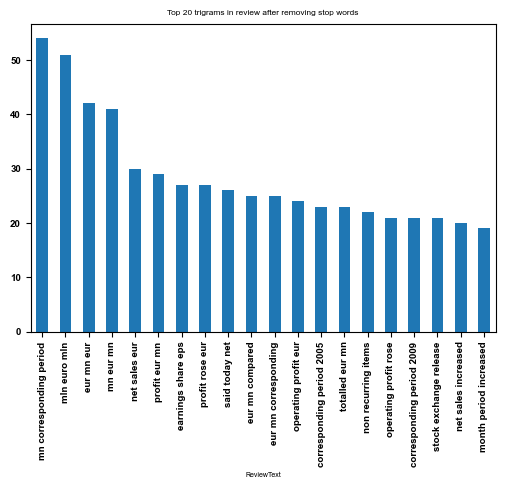

In [26]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_trigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns=['ReviewText', 'count'])
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

In [27]:
y0 = df.loc[df['sentiment'] == 'positive']['polarity']
y1 = df.loc[df['sentiment'] == 'negative']['polarity']
y2 = df.loc[df['sentiment'] == 'neutral']['polarity']

trace0 = go.Box(
    y=y0,
    name='positive',
    marker=dict(
        color='rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name='negative',
    marker=dict(
        color='rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name='neutral',
    marker=dict(
        color='rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title="Polarity Boxplot according to sentiment"
)

go.Figure(data=data, layout=layout)

In [28]:
y0 = df.loc[df['sentiment'] == 'positive']['news_len']
y1 = df.loc[df['sentiment'] == 'negative']['news_len']
y2 = df.loc[df['sentiment'] == 'neutral']['news_len']


trace0 = go.Box(
    y=y0,
    name='positive',
    marker=dict(
        color='rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name='negative',
    marker=dict(
        color='rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name='neutral',
    marker=dict(
        color='rgb(10, 140, 208)',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title="news length Boxplot by sentiment"
)
go.Figure(data=data, layout=layout)

In [29]:
xp = df.loc[df['sentiment'] == "positive", 'polarity']
xneu = df.loc[df['sentiment'] == "neutral", 'polarity']
xneg = df.loc[df['sentiment'] == "negative", 'polarity']

trace1 = go.Histogram(
    x=xp, name='positive',
    opacity=0.75
)
trace2 = go.Histogram(
    x=xneu, name='neutral',
    opacity=0.75
)
trace3 = go.Histogram(
    x=xneg, name='negative',
    opacity=0.75
)
data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title='Distribution of Sentiment polarity')
go.Figure(data=data, layout=layout)

In [30]:
trace1 = go.Scatter(
    x=df['polarity'], y=df['news_len'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['news_len'], name='density', ncontours=50,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['news_len'], name='news length density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='x unified',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

go.Figure(data=data, layout=layout)

In [31]:
trace1 = go.Scatter(
    x=df['polarity'], y=df['word_count'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['word_count'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['word_count'], name='word count density', marker=dict(color='rgb(112,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

go.Figure(data=data, layout=layout)

In [32]:
# Prepare data for machine learning models
X = df['Review Text']
y = df['sentiment']

# Convert text to numerical features
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [33]:
# Logistic Regression

# %%
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Print classification report and confusion matrix
print("Logistic Regression Classification Report:\n",
      classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.49      0.58       118
     neutral       0.76      0.89      0.82       571
    positive       0.70      0.54      0.61       281

    accuracy                           0.74       970
   macro avg       0.72      0.64      0.67       970
weighted avg       0.73      0.74      0.73       970

Logistic Regression Confusion Matrix:
 [[ 58  45  15]
 [ 13 508  50]
 [ 11 119 151]]


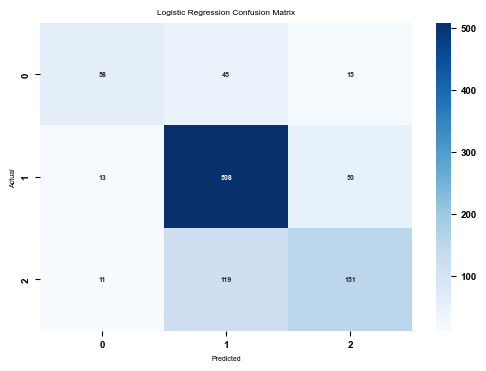

In [34]:
# Visualize Logistic Regression results
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg),
            annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Print classification report and confusion matrix
print("K-Nearest Neighbors Classification Report:\n",
      classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.12      0.20       118
     neutral       0.62      1.00      0.76       571
    positive       0.56      0.05      0.09       281

    accuracy                           0.62       970
   macro avg       0.61      0.39      0.35       970
weighted avg       0.61      0.62      0.50       970

K-Nearest Neighbors Confusion Matrix:
 [[ 14  95   9]
 [  0 569   2]
 [  7 260  14]]


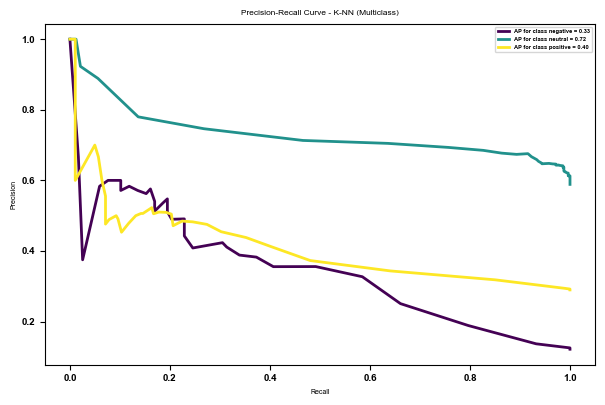

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Check the number of classes
classes = np.unique(y_test)
n_classes = len(classes)

# Binarize the output for multiclass
y_test_binarized = label_binarize(y_test, classes=classes)
# Obtain probability estimates for each class
y_prob = knn.predict_proba(X_test)

# Compute Precision-Recall and Average Precision for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        y_test_binarized[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(
        y_test_binarized[:, i], y_prob[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(6, 4))  # Reduced figure size for a smaller plot

# Updated to use plt.get_cmap to avoid deprecation warning
colors = plt.get_cmap('viridis', n_classes)

for i in range(n_classes):
    plt.plot(recall[i], precision[i], color=colors(i),
             lw=2, label=f'AP for class {classes[i]} = {average_precision[i]:0.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - K-NN (Multiclass)')
# Adjust legend font size if needed
plt.legend(loc="upper right", fontsize='small')
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()

In [37]:
# Decision Tree

# %%
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)

# Print classification report and confusion matrix
print("Decision Tree Classification Report:\n",
      classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_tree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.54      0.57       118
     neutral       0.75      0.83      0.78       571
    positive       0.65      0.53      0.58       281

    accuracy                           0.71       970
   macro avg       0.66      0.63      0.64       970
weighted avg       0.70      0.71      0.70       970

Decision Tree Confusion Matrix:
 [[ 64  39  15]
 [ 33 472  66]
 [ 11 121 149]]


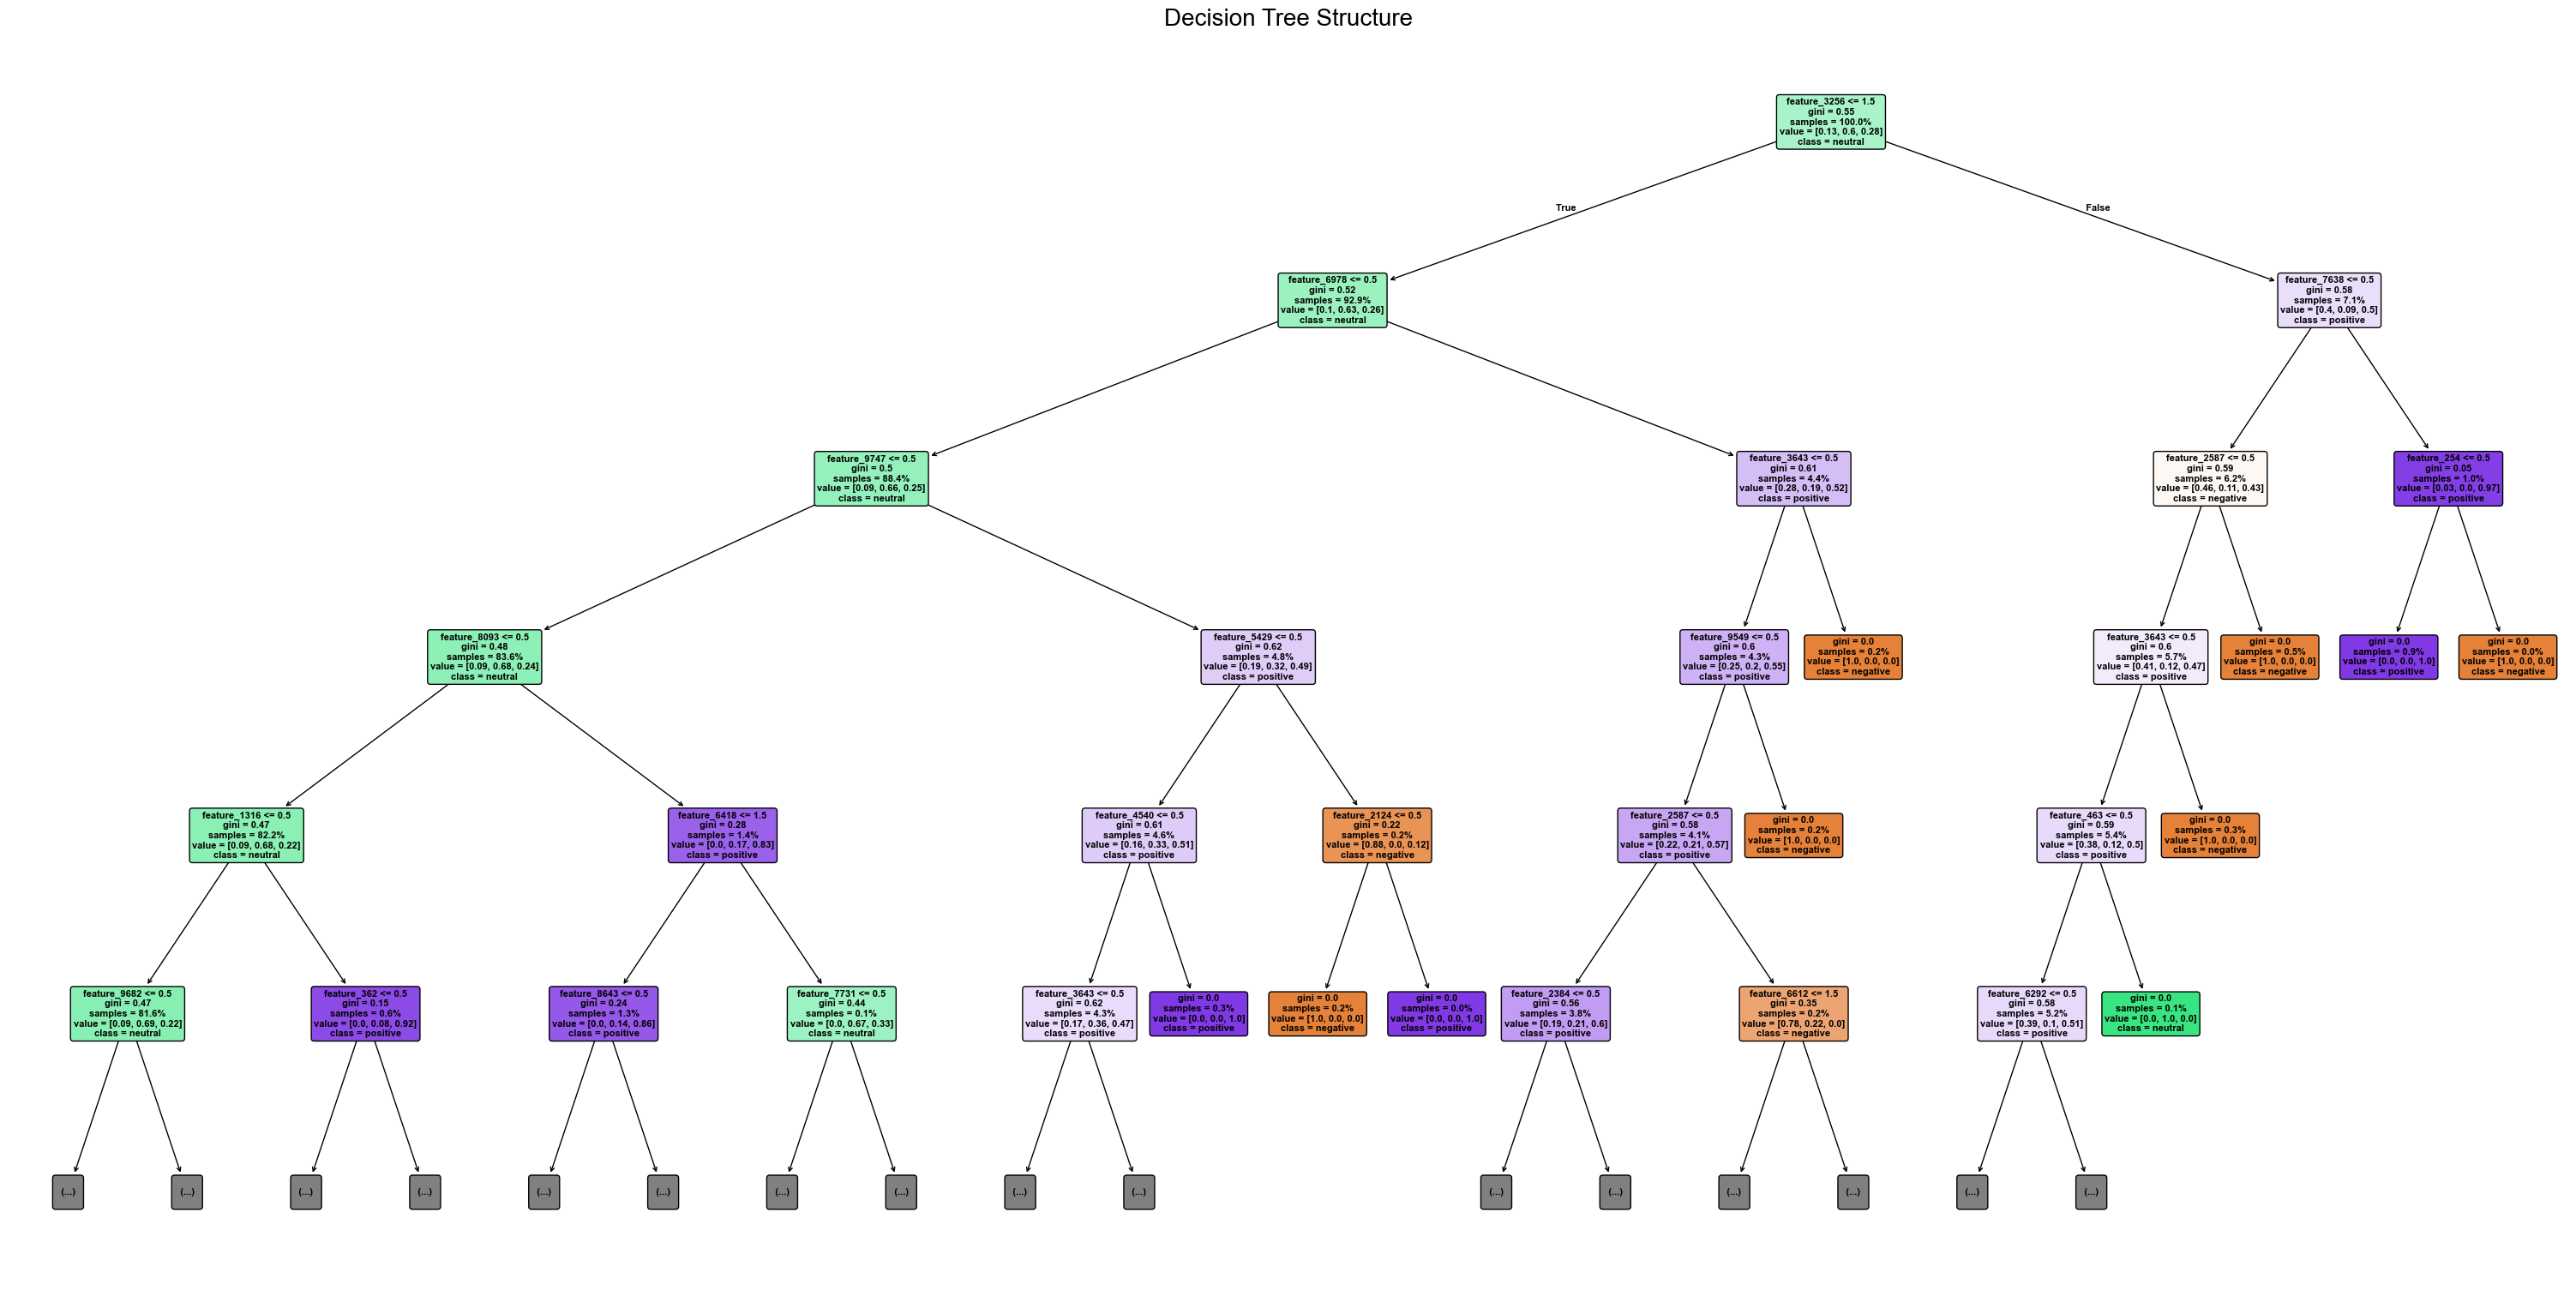

Top 20 Most Important Features:
feature_3256: 0.0554
feature_6978: 0.0270
feature_9747: 0.0168
feature_7638: 0.0161
feature_8093: 0.0161
feature_7744: 0.0137
feature_3643: 0.0130
feature_2587: 0.0128
feature_1316: 0.0107
feature_4541: 0.0105
feature_5429: 0.0099
feature_4540: 0.0099
feature_9682: 0.0092
feature_5196: 0.0089
feature_2171: 0.0072
feature_7731: 0.0072
feature_2165: 0.0070
feature_7523: 0.0065
feature_4509: 0.0053
feature_6292: 0.0051


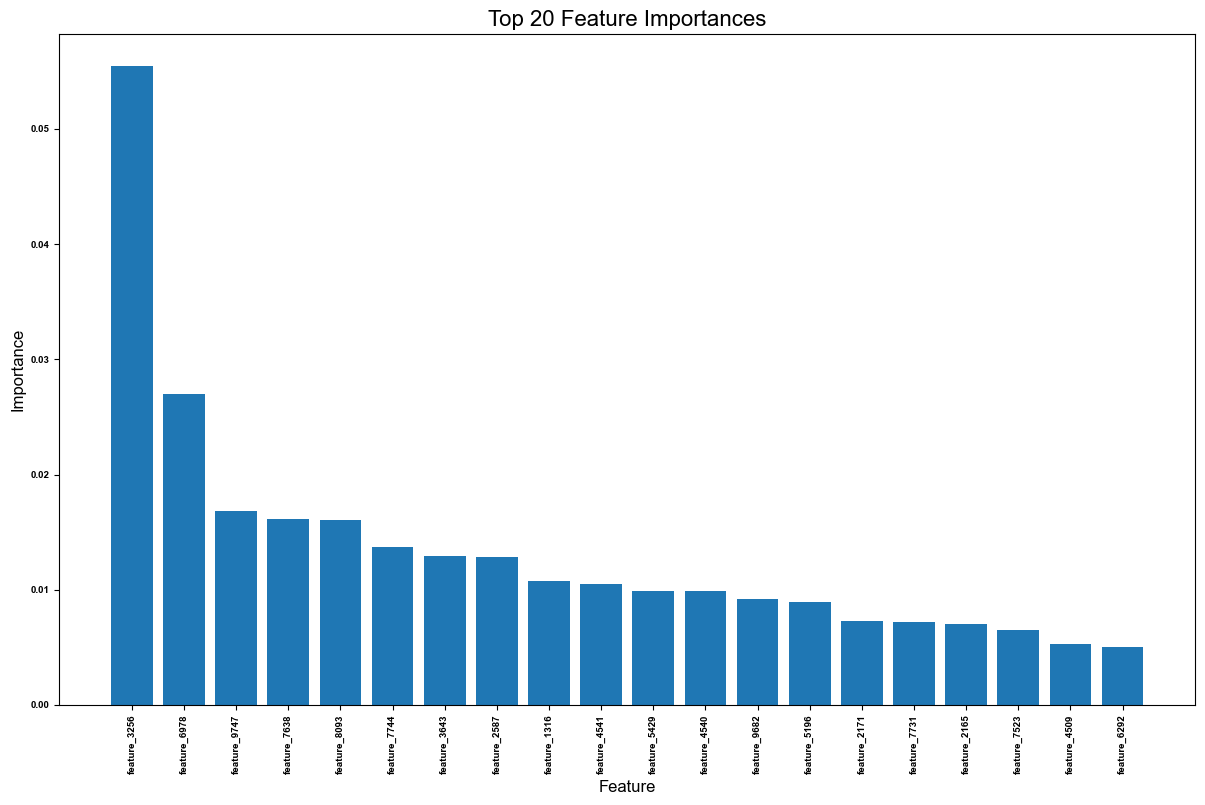

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np


if hasattr(X_train, 'tocsr'):  
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
else:
    feature_names = X_train.columns if hasattr(X_train, 'columns') else None

class_names = [str(name) for name in decision_tree.classes_]

y
plt.figure(figsize=(30, 15))  

# Plot the decision tree
plot_tree(
    decision_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8,  
    max_depth=5,  
    proportion=True,  
    precision=2,  
    impurity=True, 
    label='all' 
)

plt.title('Decision Tree Structure', fontsize=20)
plt.tight_layout()
plt.show()

# Print feature importances
importances = decision_tree.feature_importances_
feature_importance_dict = dict(zip(feature_names, importances))
sorted_importances = sorted(
    feature_importance_dict.items(), key=lambda x: x[1], reverse=True)



# Plot feature importances for top 20 features
plt.figure(figsize=(12, 8))
top_20_features = sorted_importances[:20]
plt.bar(range(len(top_20_features)), [imp for _, imp in top_20_features])
plt.title('Top 20 Feature Importances', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(range(len(top_20_features)), [
           name for name, _ in top_20_features], rotation=90)
plt.tight_layout()
plt.show()